In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("/Users/amulya/Desktop/Biomedical-Text-Extraction-main/pubmed/Csv_files/pubmed_data.csv")

In [3]:
df.head()

Unnamed: 0                                              Title  \
0           0  corrigendum to "consensus report on glucagon-l...   
1           1  human primary macrophages can transmit coxsack...   
2           2  association between insulin-associated gene po...   
3           3  improvement of glycemia risk index and continu...   
4           4  transmucosal glucagon rapidly increases blood ...   

                                            Abstract  \
0                                        no abstract   
1                                        no abstract   
2  while statins are effective at managing lipid ...   
3  managing glycemia during ramadan is challengin...   
4  to evaluate the effect of transmucosal glucago...   

                                      Journal Language  Year Month  \
0  journal of diabetes science and technology      eng  2024   Nov   
1                 journal of medical virology      eng  2024   Dec   
2  european journal of clinical investigation      eng  2024   Nov   
3  journal of diabetes science and technology      eng  2024   Nov   
4      journal of feline medicine and surgery      eng  2024   Nov   

                                             Authors  \
0                                                NaN   
1                             Brisse Morgan, Ly Hinh   
2  Park Minju, Kim Jung Sun, Park Yoon-A, Lee Da ...   
3                Al Hayek Ayman, Al Dawish Mohamed A   
4  Cohen Emily A, Porter Lauren, Crews Chiquitha ...   

                                        Affiliations  \
0                                                NaN   
1  viral immunity and pathogenesis unit, laborato...   
2  college of pharmacy and graduate school of pha...   
3  department of endocrinology and diabetes, diab...   
4  department of small animal clinical sciences, ...   

                                         Name  ...      EISSN Impact_Factor  \
0  journal of diabetes science and technology  ...  1932-2968           4.1   
1                 journal of medical virology  ...  1096-9071           6.8   
2  european journal of clinical investigation  ...  1365-2362           4.4   
3  journal of diabetes science and technology  ...  1932-2968           4.1   
4      journal of feline medicine and surgery  ...  1532-2750           1.9   

  Impact_Factor_5Years                             Journal_Category  \
0                  NaN         ENDOCRINOLOGY & METABOLISM|Q2|49/186   
1                  6.6                             VIROLOGY|Q1|4/41   
2                  4.7  MEDICINE, RESEARCH & EXPERIMENTAL|Q2|57/189   
3                  NaN         ENDOCRINOLOGY & METABOLISM|Q2|49/186   
4                  2.0                VETERINARY SCIENCES|Q2|46/167   

                                        Universities Study_Type_Extracted  \
0                                            Unknown              Unknown   
1  national institute of allergy and infectious d...              Unknown   
2  college of pharmacy, ewha womans university, c...              Unknown   
3  department of endocrinology and diabetes, diab...              Unknown   
4  university of florida, college of veterinary m...              Unknown   

  Standardized_University University Rank Research_Score  
0                 unknown        NaN  NaN            NaN  
1      national institute        NaN  NaN            NaN  
2       womans university        NaN  NaN            NaN  
3                 unknown        NaN  NaN            NaN  
4                 unknown        NaN  NaN            NaN  

[5 rows x 22 columns]

## Data Pre-processing

In [4]:
columns = ["Standardized_University", "University", "Rank", "Research_Score"]

In [5]:
# Filter out rows where any of the specified columns contain "unknown" or NaN

# Drop rows with "unknown" or "nan" in object columns and NaN in numeric columns
for col in columns:
    if df[col].dtype == 'object':  # If the column is a string/object type
        df[col] = df[col].astype(str).str.strip().str.lower()
        df = df[~df[col].isin(["unknown", "nan"])]
    else:  # If the column is numeric
        df = df[df[col].notna()]  # Keep rows where the value is not NaN

# Reset index
df = df.reset_index(drop=True)

print(df)


     Unnamed: 0                                              Title  \
0             9  prevalence and association of sleep duration a...   
1            13  the impact of pparγ and apoe gene polymorphism...   
2            18  immune checkpoint landscape of human atheroscl...   
3            19  ezrin drives adaptation of monocytes to the in...   
4            21  determining the quality of life and associated...   
..          ...                                                ...   
508        3240  association between within-target risk factors...   
509        3249  cerebral ischemic injury impairs autophagy and...   
510        3250  the comprehensive resilience-building psychoso...   
511        3254  meta-analysis reveals an inverse relationship ...   
512        3260  xanthohumol protects against neuronal excitoto...   

                                              Abstract  \
0    this study aimed to examine the prevalence of ...   
1    globally, diabetic kidney disease (dkd

In [6]:
df = df.drop(columns=['University', 'Unnamed: 0'], errors='ignore')

In [7]:
def get_median_rank(rank_str: str):
    """
    If rank_str is a range like '501–600' or '501-600',
    return the midpoint. If it's a single number (e.g. '10'),
    return that number as float.
    """
    # Normalize dash variations: 501–600 -> 501-600
    rank_str = rank_str.replace('–', '-').strip()
    
    # Find all digits (e.g., '501', '600')
    numbers = re.findall(r'\d+', rank_str)
    if not numbers:
        return None  # or np.nan, depending on preference
    
    if len(numbers) == 2:
        lower, upper = map(int, numbers)
        return (lower + upper) / 2.0
    else:
        # If there's just one number
        return float(numbers[0])

In [8]:
import re
df['Rank_Median'] = df['Rank'].apply(get_median_rank)

In [9]:
# Check unique values in the "Languages" column
unique_languages = df['Language'].unique()
print("Unique languages:", unique_languages)

df = df[~df['Language'].str.strip().str.lower().eq('por')]

Unique languages: ['eng' 'por']


## Univariate Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [11]:
def basic_statistics(df):
    """
    Calculate basic statistics for numeric and categorical columns.
    """
    numeric_stats = df.describe(include=[float, int]).T  # Numeric columns
    categorical_stats = df.describe(include=[object]).T  # Categorical columns

   
    numeric_stats['missing_values'] = df.isnull().sum()
    numeric_stats['unique_values'] = df.nunique()

   
    categorical_stats['missing_values'] = df.isnull().sum()
    categorical_stats['unique_values'] = df.nunique()

    return numeric_stats, categorical_stats


numeric_stats, categorical_stats = basic_statistics(df)

print("Numeric Column Statistics:\n", numeric_stats)
print("\nCategorical Column Statistics:\n", categorical_stats)


Numeric Column Statistics:
                       count         mean         std     min     25%     50%  \
Year                  511.0  2024.027397    0.163398  2024.0  2024.0  2024.0   
Impact_Factor         511.0     5.476908    5.821459     0.6     2.7     3.9   
Impact_Factor_5Years  502.0     6.050000    6.407162     0.7     3.0     4.3   
Research_Score        511.0    47.734834   24.051808     9.1    29.0    46.3   
Rank_Median           511.0   365.573386  403.463064     2.0    55.0   185.0   

                         75%     max  missing_values  unique_values  
Year                  2024.0  2025.0               0              2  
Impact_Factor            5.7    50.5               0             98  
Impact_Factor_5Years     6.2    54.4               9            102  
Research_Score          67.8    99.9               0            118  
Rank_Median            550.5  1501.0               0             48  

Categorical Column Statistics:
                         count unique  

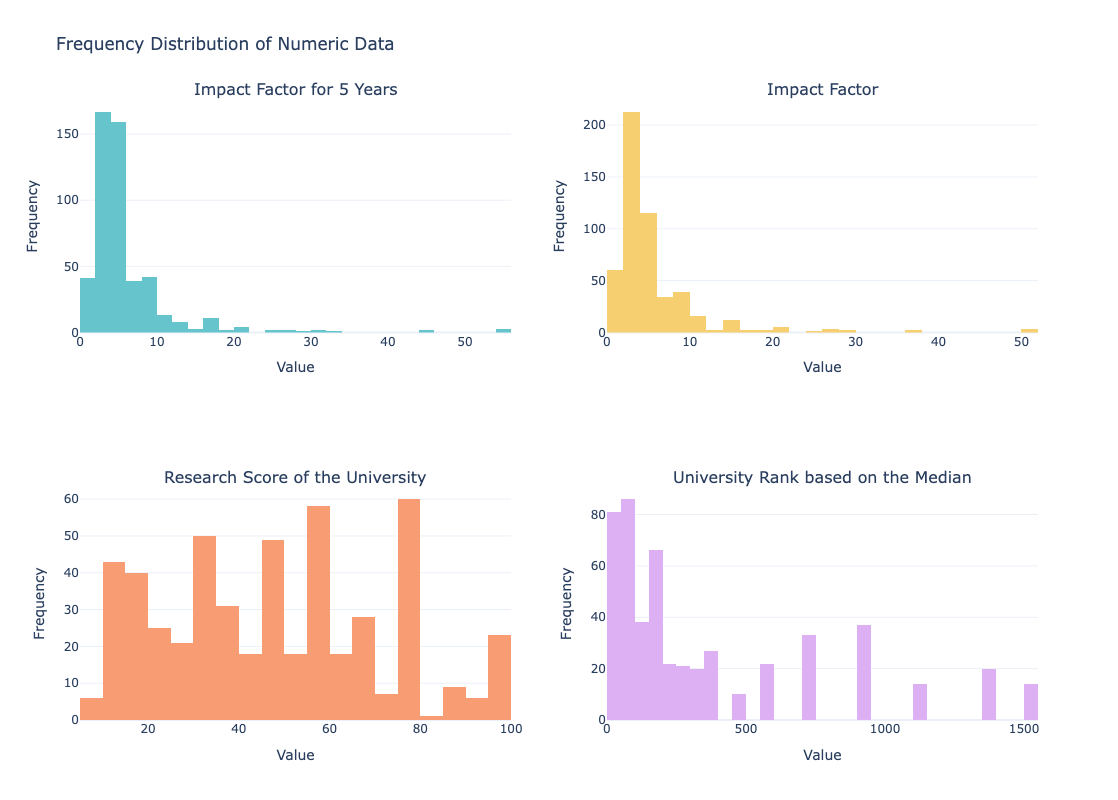

In [16]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

def plot_interactive_histograms(df, columns, titles, bins=30, colors=None):
    """
    Plot interactive histograms for multiple columns in a grid layout using Plotly.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to plot.
        titles (list): List of titles corresponding to the columns.
        bins (int): Number of bins for the histograms (default: 30).
        colors (list): List of colors for each histogram (default: None, assigns pastel colors).
    """
    num_columns = len(columns)
    rows = (num_columns + 1) // 2  

    
    if colors is None:
        colors = px.colors.qualitative.Pastel

    # Create a subplot grid layout
    fig = sp.make_subplots(rows=rows, cols=2, subplot_titles=titles)

    for i, (column, title) in enumerate(zip(columns, titles)):
        row = (i // 2) + 1
        col = (i % 2) + 1
        fig.add_trace(
            go.Histogram(
                x=df[column],
                nbinsx=bins,
                marker_color=colors[i % len(colors)],
                name=title
            ),
            row=row,
            col=col
        )

    # Update layout
    fig.update_layout(
        title_text="Frequency Distribution of Numeric Data",
        height=rows * 400, 
        width=1000,
        showlegend=False,  
        template="plotly_white"  
    )
    
    # Add axis labels for better context
    fig.update_xaxes(title_text="Value")
    fig.update_yaxes(title_text="Frequency")
    
    fig.show()

# Example Usage
columns_to_plot = ['Impact_Factor_5Years', 'Impact_Factor', 'Research_Score', 'Rank_Median']
title_columns = ['Impact Factor for 5 Years', 'Impact Factor', 'Research Score of the University', 'University Rank based on the Median']

plot_interactive_histograms(df, columns_to_plot, title_columns)

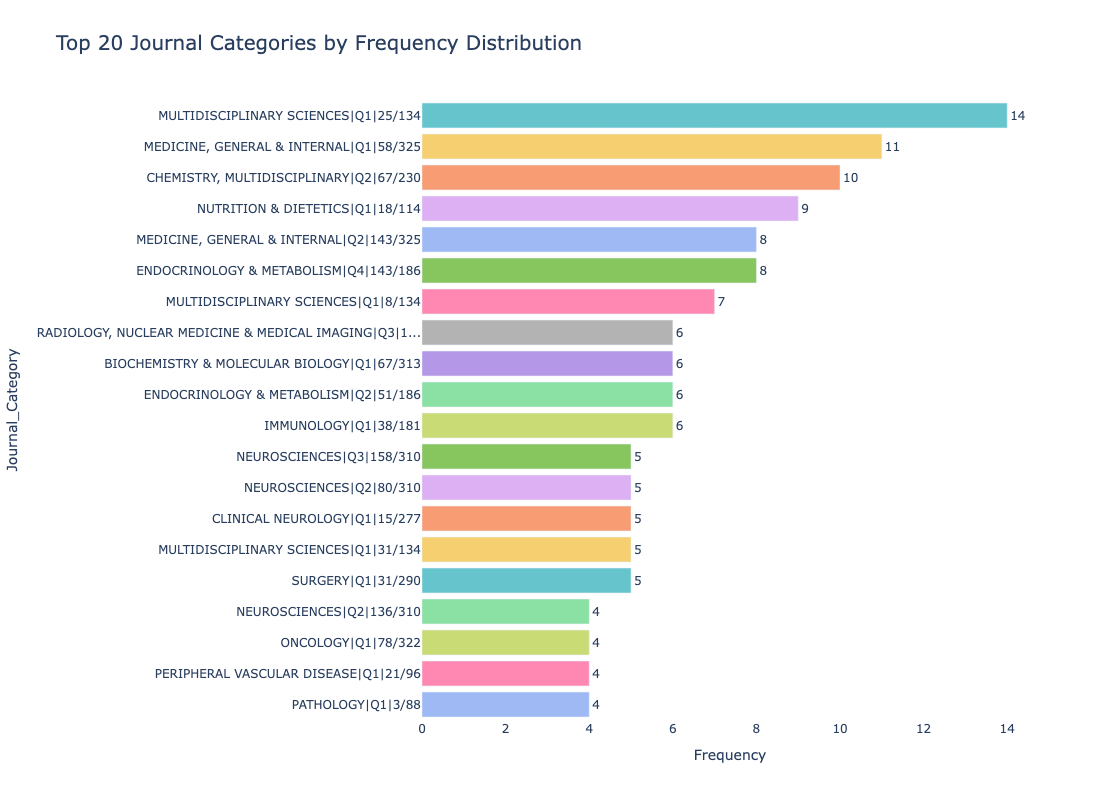

In [17]:
def plot_top_frequencies(df, column_name, title, top_n=15, exclude_value=None, max_label_length=50):
    """
    Plot the top N categories or journals by frequency distribution using Plotly, with better label visibility.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The column name to analyze.
        title (str): The title for the plot.
        top_n (int): The number of top values to plot (default: 15).
        exclude_value (str): Value to exclude from the analysis (default: None).
        max_label_length (int): Maximum length of labels before truncating (default: 50).
    """
    # Exclude specified value if provided
    if exclude_value is not None:
        filtered_df = df[df[column_name].str.lower() != exclude_value.lower()]
    else:
        filtered_df = df

    # Calculate the frequency distribution
    value_counts = filtered_df[column_name].value_counts()

    # Extract the top N values
    top_values = value_counts.head(top_n).reset_index()
    top_values.columns = [column_name, "Frequency"]

    # Truncate long labels
    top_values["Truncated_Label"] = top_values[column_name].apply(
        lambda x: x if len(x) <= max_label_length else x[:max_label_length] + "..."
    )

    # Create the interactive bar chart using Plotly
    fig = px.bar(
        top_values,
        x="Frequency",
        y="Truncated_Label",
        text="Frequency",
        orientation="h",  # Horizontal bar chart
        title=title,
        labels={"Truncated_Label": column_name, "Frequency": "Frequency"},
        color="Truncated_Label",  # Use different colors for each category
        color_discrete_sequence=px.colors.qualitative.Pastel  # Pastel color palette
    )

    # Customize the layout
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(
        showlegend=False,  # Remove legend
        xaxis_title="Frequency",
        yaxis_title=column_name,
        yaxis=dict(categoryorder="total ascending"),  # Sort bars by frequency
        plot_bgcolor="white",
        paper_bgcolor="white",
        title_font=dict(size=20),
        font=dict(size=12),
        width=1000,
        height=800  # Increased height for better visibility
    )
    fig.show()


plot_top_frequencies(
    df, 
    column_name="Journal_Category", 
    title="Top 20 Journal Categories by Frequency Distribution",
    top_n=20,
    max_label_length=50
)


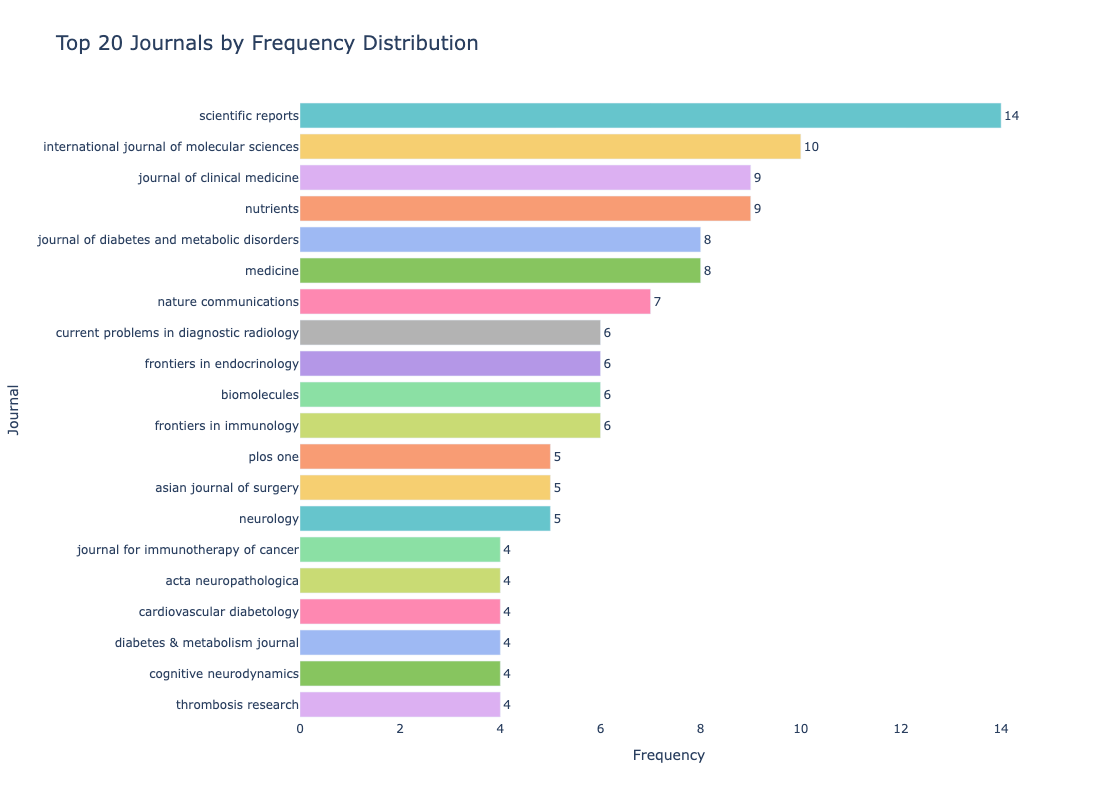

In [18]:
# Plot for Journals
plot_top_frequencies(
    df, 
    column_name="Journal", 
    title="Top 20 Journals by Frequency Distribution",
    top_n=20,
    max_label_length=50
)

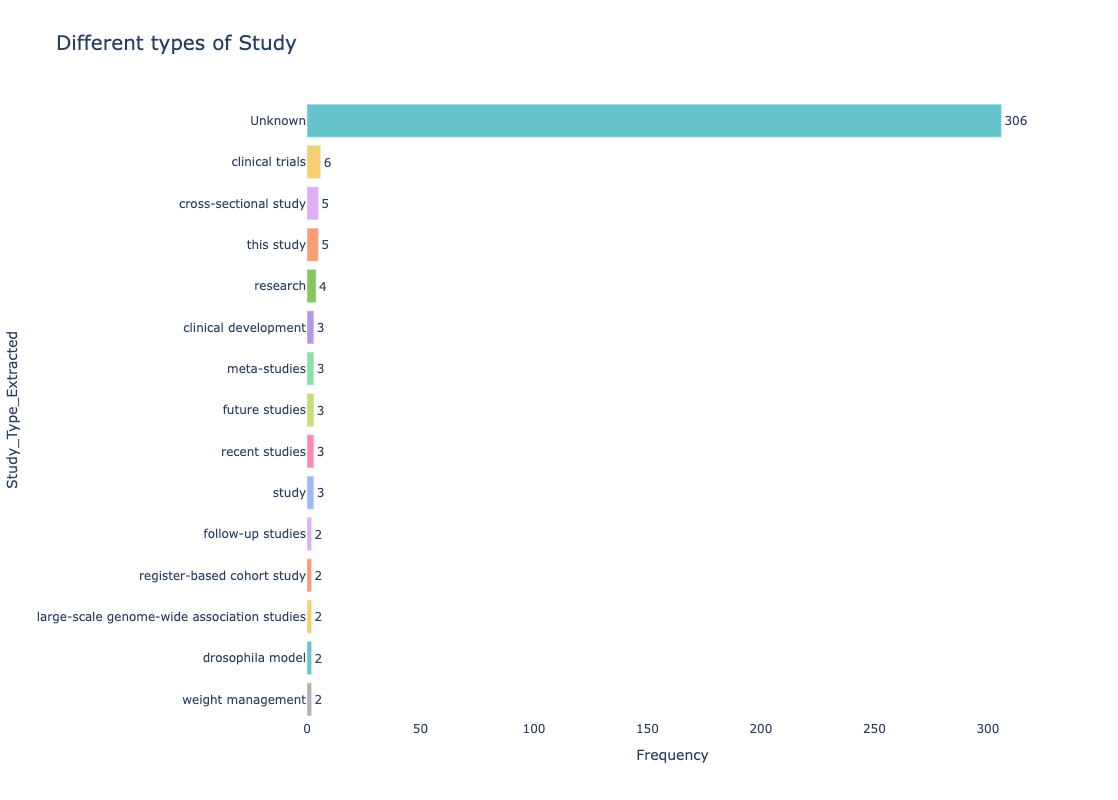

In [19]:
#Plot for Study Types
plot_top_frequencies(
    df, 
    column_name="Study_Type_Extracted", 
    title="Different types of Study",
    top_n=15,
    max_label_length=50
)

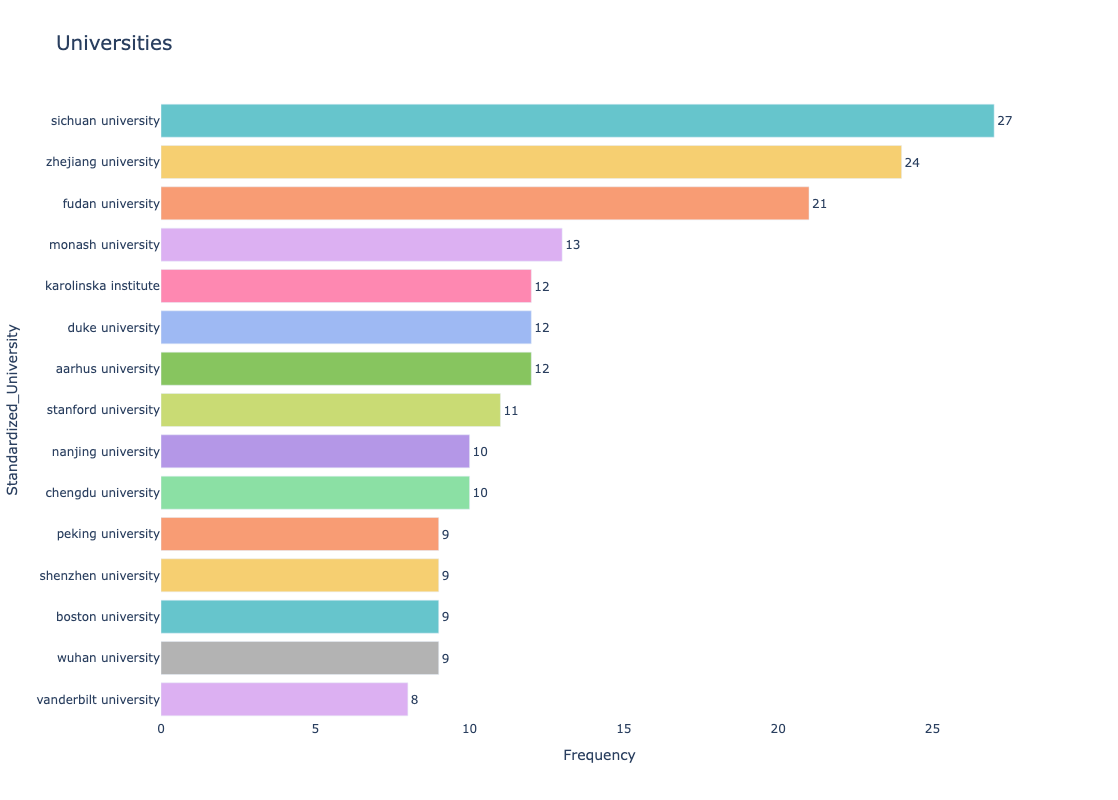

In [20]:
plot_top_frequencies(
    df, 
    column_name="Standardized_University", 
    title="Universities",
    top_n=15,
    max_label_length = 50
)

## Bivariate Analysis

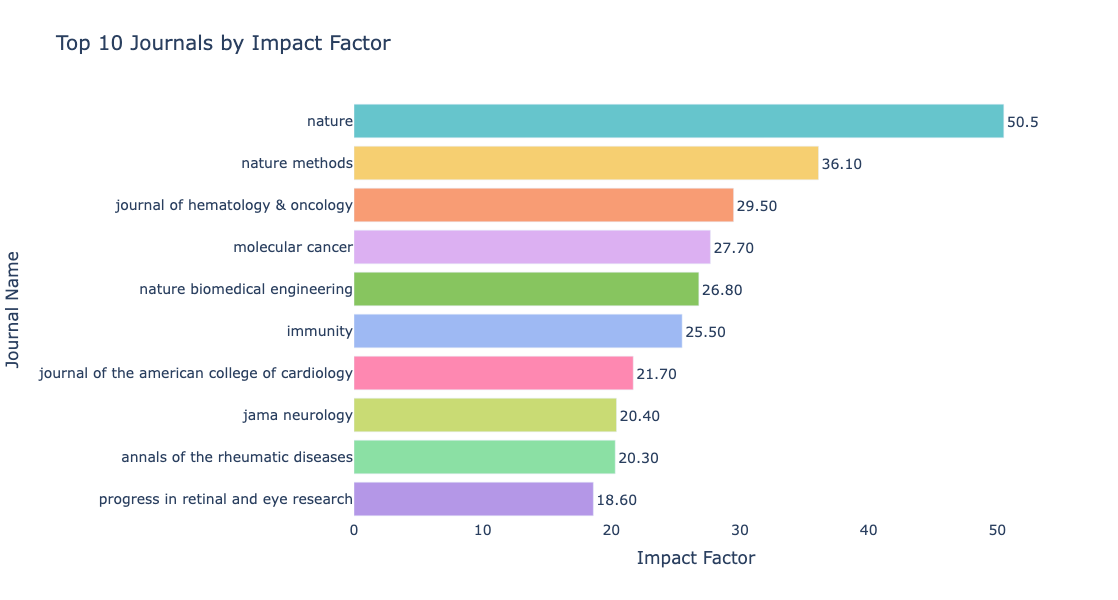

In [21]:
def plot_top_impact_factors(df, value_column, category_column, title, labels, top_n=10):
    """
    Plot a horizontal bar chart for top N unique journals by Impact Factor using Plotly.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        value_column (str): Column for the impact factor (numerical values).
        category_column (str): Column for the journal names (categorical).
        title (str): Title for the chart.
        labels (dict): Dictionary for customizing axis labels.
        top_n (int): Number of top values to extract (default: 10).
    """
    # Ensure numeric conversion for the impact factor column
    df[value_column] = pd.to_numeric(df[value_column], errors="coerce")

    # Drop duplicate journals based on the category_column
    unique_df = df.drop_duplicates(subset=[category_column], keep="first")

    # Extract the top N unique journals by impact factor
    top_values = unique_df.nlargest(top_n, value_column)

    # Create the bar chart using Plotly
    fig = px.bar(
        top_values,
        x=value_column,
        y=category_column,
        text=value_column,
        orientation="h",  # Horizontal bar chart
        title=title,
        labels=labels,  # Pass labels dictionary
        color=category_column,  # Assign colors based on journal names
        color_discrete_sequence=px.colors.qualitative.Pastel  # Use pastel colors
    )

    # Customize the layout
    fig.update_traces(texttemplate="%{text:.2f}", textposition="outside")
    fig.update_layout(
        xaxis_title=labels.get(value_column, value_column),
        yaxis_title=labels.get(category_column, category_column),
        yaxis=dict(categoryorder="total ascending"),  # Sort bars by value
        plot_bgcolor="white",
        paper_bgcolor="white",
        title_font=dict(size=20),
        font=dict(size=14),
        width=1000,
        height=600,
        showlegend=False  # Remove legend
    )
    fig.show()

plot_top_impact_factors(
    df,
    value_column="Impact_Factor",
    category_column="Journal",
    title="Top 10 Journals by Impact Factor",
    labels={"Journal": "Journal Name", "Impact_Factor": "Impact Factor"},
    top_n=10
)


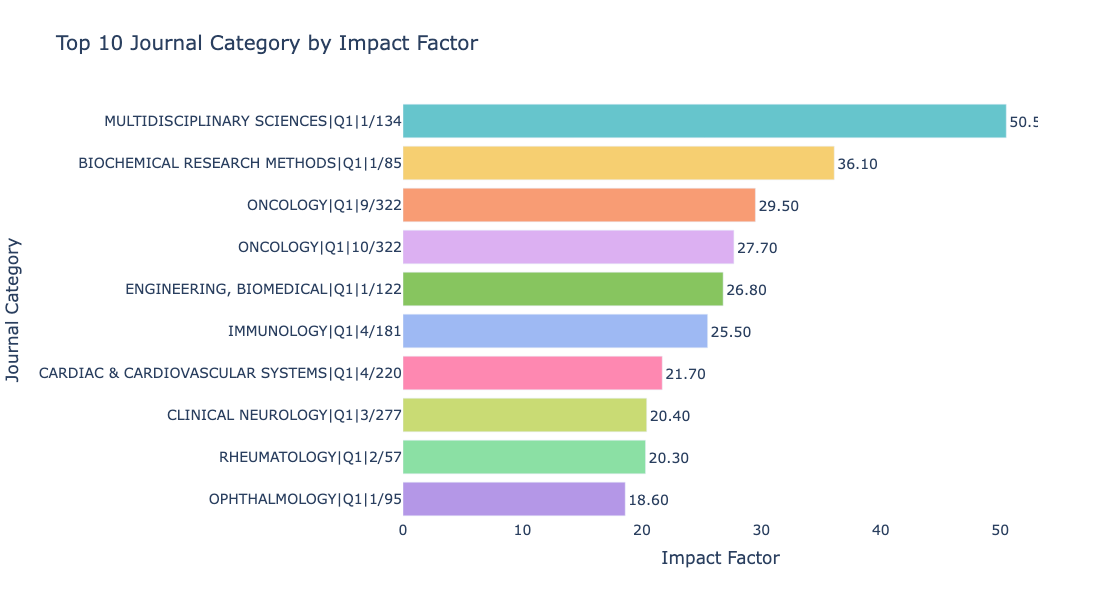

In [22]:
plot_top_impact_factors(
    df,
    value_column="Impact_Factor",
    category_column="Journal_Category",
    title="Top 10 Journal Category by Impact Factor",
    labels={"Journal_Category": "Journal Category", "Impact_Factor": "Impact Factor"},
    top_n=10
)

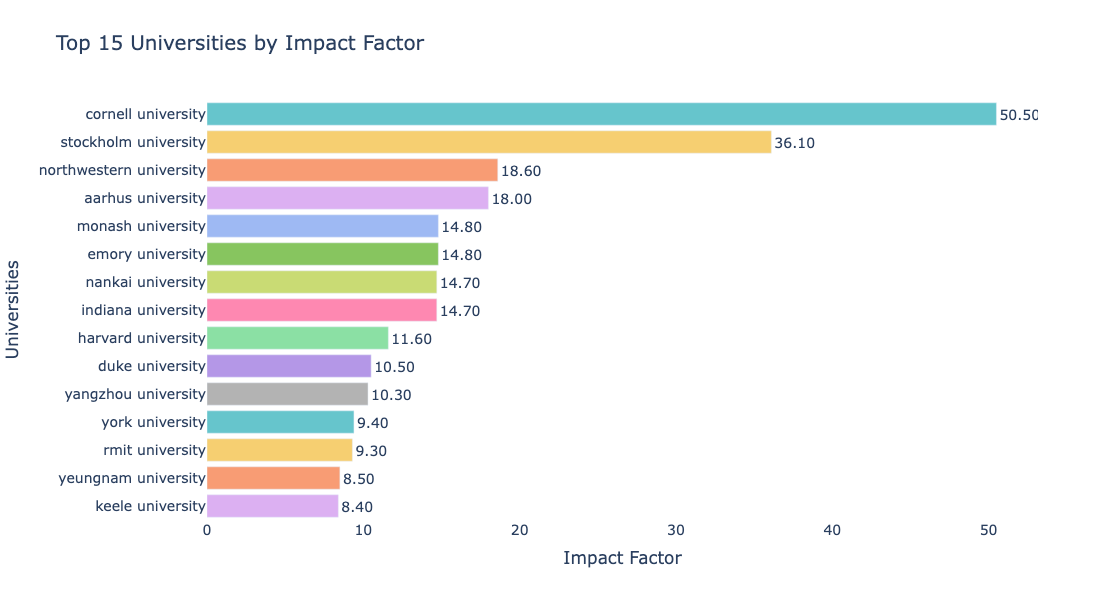

In [23]:
plot_top_impact_factors(
    df,
    value_column="Impact_Factor",
    category_column="Standardized_University",
    title="Top 15 Universities by Impact Factor",
    labels={"Standardized_University": "Universities", "Impact_Factor": "Impact Factor"},
    top_n=15
)

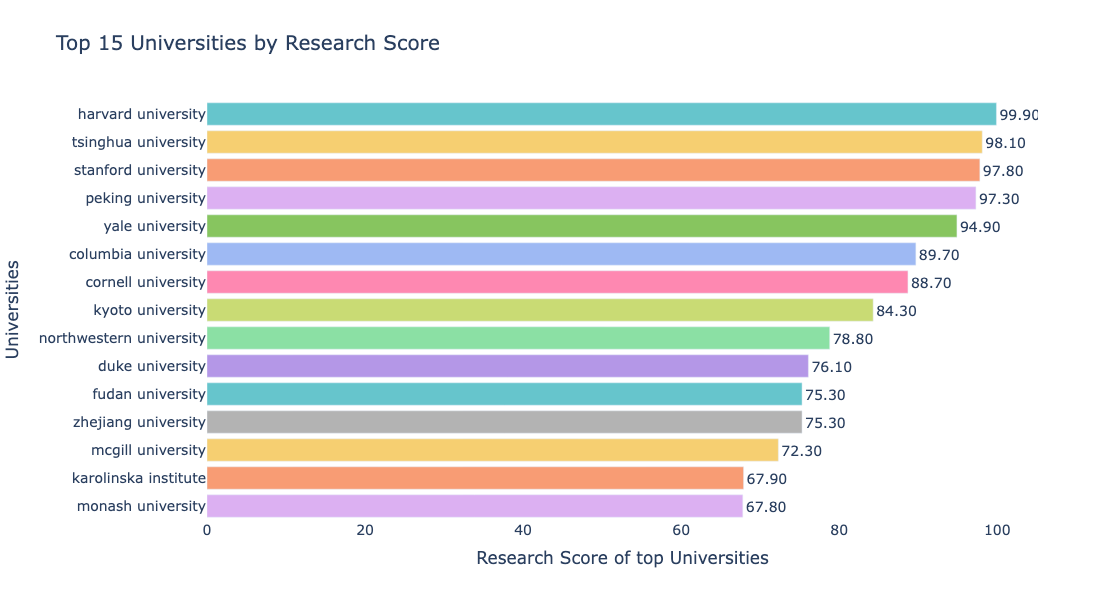

In [24]:
#Using the same function to plot universities vs the research score
plot_top_impact_factors(
    df,
    value_column="Research_Score",
    category_column="Standardized_University",
    title="Top 15 Universities by Research Score",
    labels={"Standardized_University": "Universities", "Research_Score": "Research Score of top Universities"},
    top_n=15
)

## Multivariate Analysis

/var/folders/ht/cmjf8n0d4m92s779lvtr3kcr0000gn/T/ipykernel_12627/3572650548.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



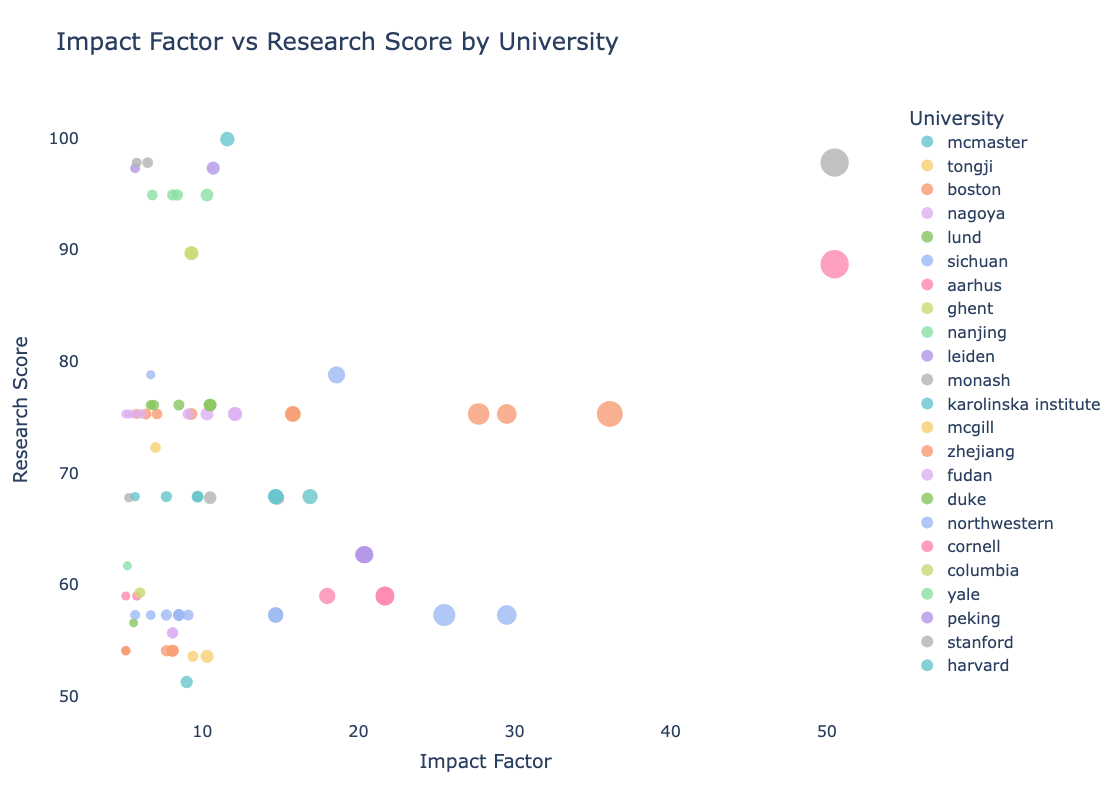

In [25]:
import plotly.express as px

# Filter data: Research Score > 70 and Impact Factor > 10
filtered_df = df[(df["Research_Score"] > 50) & (df["Impact_Factor"] > 5)]

# Remove "university" from each university name and clean whitespace
filtered_df["University"] = filtered_df["Standardized_University"].str.replace("university", "", case=False).str.strip()

# Drop rows with missing values in relevant columns
filtered_df = filtered_df.dropna(subset=["Impact_Factor", "Research_Score", "Impact_Factor_5Years"])

# Sort the dataset by Research Score in ascending order
filtered_df = filtered_df.sort_values(by="Research_Score", ascending=True).reset_index(drop=True)

# Create a scatter plot
fig = px.scatter(
    filtered_df,
    x="Impact_Factor",
    y="Research_Score",
    size="Impact_Factor_5Years",  # Bubble size
    color="University",  # Color by university
    title="Impact Factor vs Research Score by University",
    labels={"Impact_Factor": "Impact Factor", "Research_Score": "Research Score"},
    hover_data=["University", "Impact_Factor_5Years"],
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Use pastel colors
)

# Customize layout for larger size and plain white background
fig.update_layout(
    width=1200,  # Set figure width
    height=800,  # Set figure height
    plot_bgcolor="white",  # Set plot background to white
    paper_bgcolor="white",  # Set entire background to white
    title_font=dict(size=24),  # Adjust title font size
    font=dict(size=16),  # Adjust general font size
)

# Remove borders from bubbles
fig.update_traces(marker=dict(opacity=0.8, line=dict(width=0)))  # No border

# Display the figure
fig.show()

Correlation Matrix:
                           Year  Impact_Factor  Impact_Factor_5Years  \
Year                  1.000000      -0.051280             -0.059728   
Impact_Factor        -0.051280       1.000000              0.990614   
Impact_Factor_5Years -0.059728       0.990614              1.000000   
Research_Score        0.063669       0.176207              0.181688   
Rank_Median          -0.047500      -0.186986             -0.193808   

                      Research_Score  Rank_Median  
Year                        0.063669    -0.047500  
Impact_Factor               0.176207    -0.186986  
Impact_Factor_5Years        0.181688    -0.193808  
Research_Score              1.000000    -0.811166  
Rank_Median                -0.811166     1.000000  


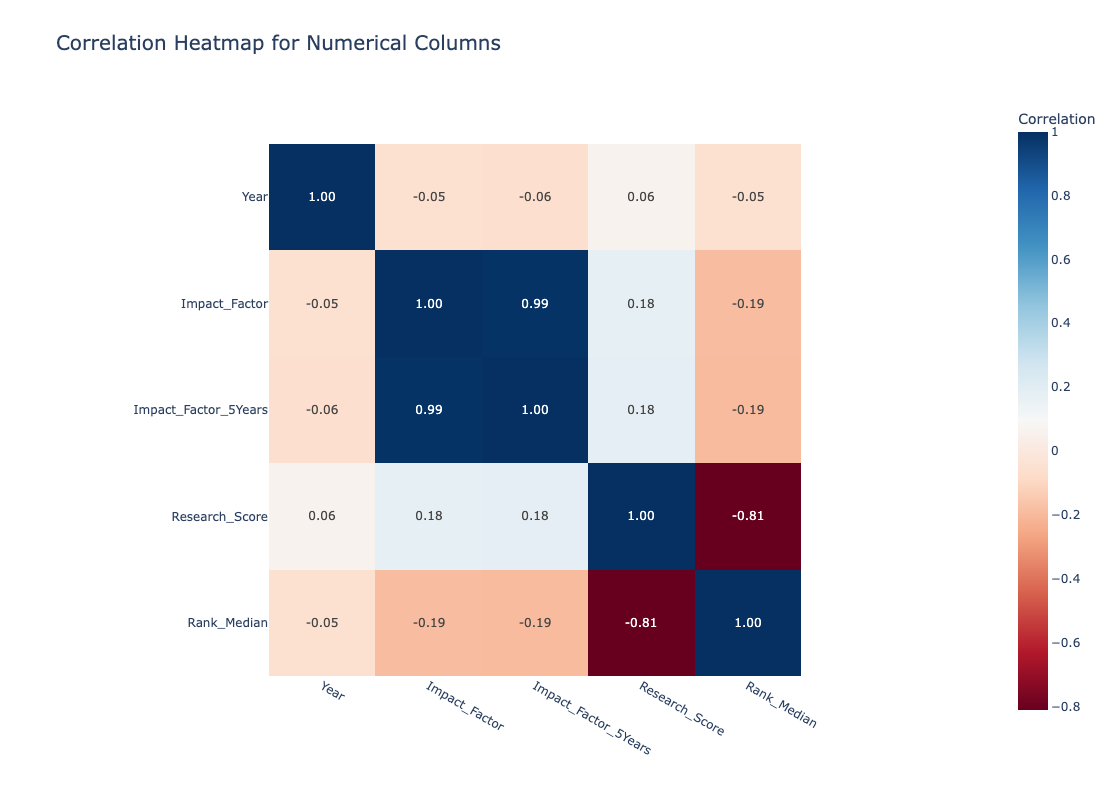

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def analyze_correlations(df, title="Correlation Heatmap"):
    """
    Analyze and visualize correlations between numerical columns in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        title (str): The title for the heatmap (default: "Correlation Heatmap").
    """
    # Select only numerical columns for correlation
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
    correlation_matrix = df[numerical_columns].corr()

    # Print correlation matrix
    print("Correlation Matrix:\n", correlation_matrix)

    # Interactive Plotly Heatmap with compatible colorscale
    fig = px.imshow(
        correlation_matrix,
        text_auto=".2f",
        color_continuous_scale="RdBu",  # Compatible Plotly colorscale similar to coolwarm
        title=title,
        labels=dict(color="Correlation"),
    )
    fig.update_layout(
        width=800, 
        height=800, 
        title_font=dict(size=20), 
        font=dict(size=12)
    )
    fig.show()

# Example Usage
analyze_correlations(df, title="Correlation Heatmap for Numerical Columns")


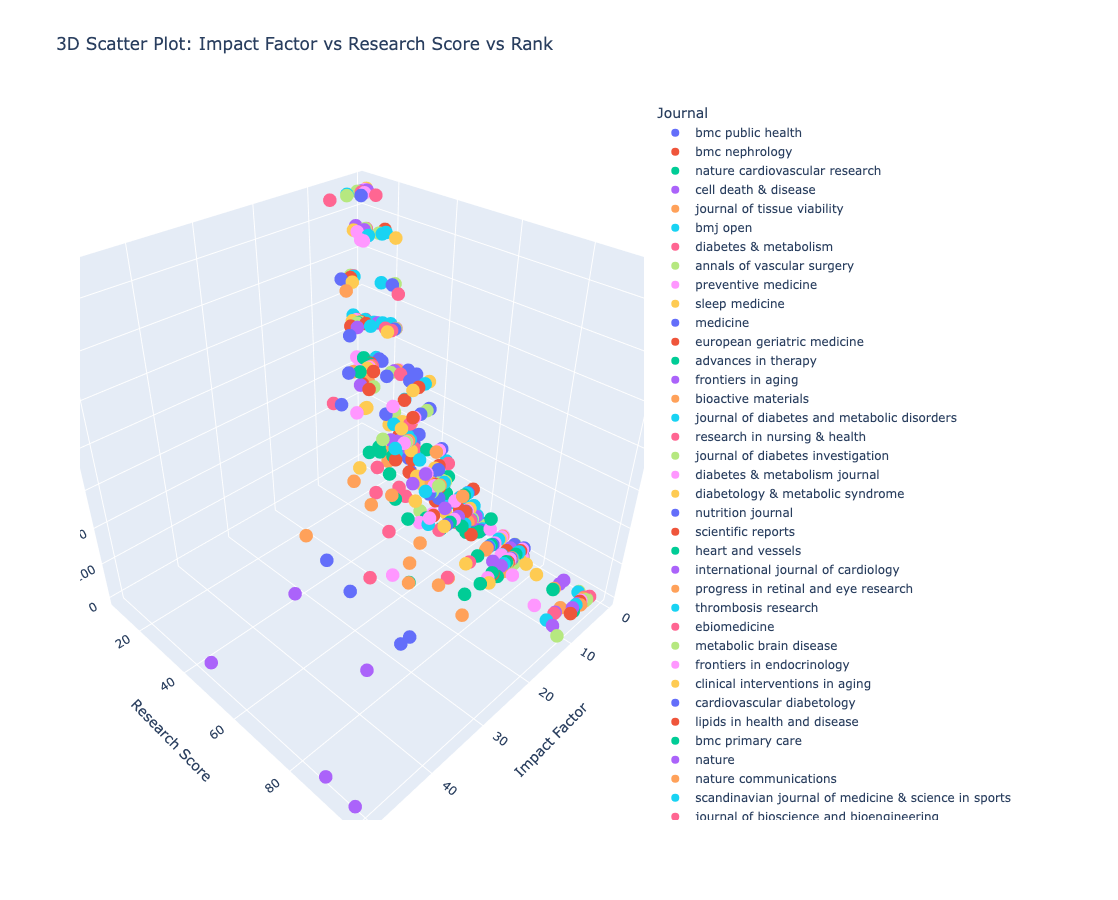

In [27]:
fig = px.scatter_3d(
    df, 
    x="Impact_Factor", 
    y="Research_Score", 
    z="Rank_Median", 
    color="Journal", 
    title="3D Scatter Plot: Impact Factor vs Research Score vs Rank",
    labels={"Impact_Factor": "Impact Factor", "Research_Score": "Research Score", "Rank_Median": "Median Rank"}
)
fig.update_layout(width=1000, height=900)
fig.show()


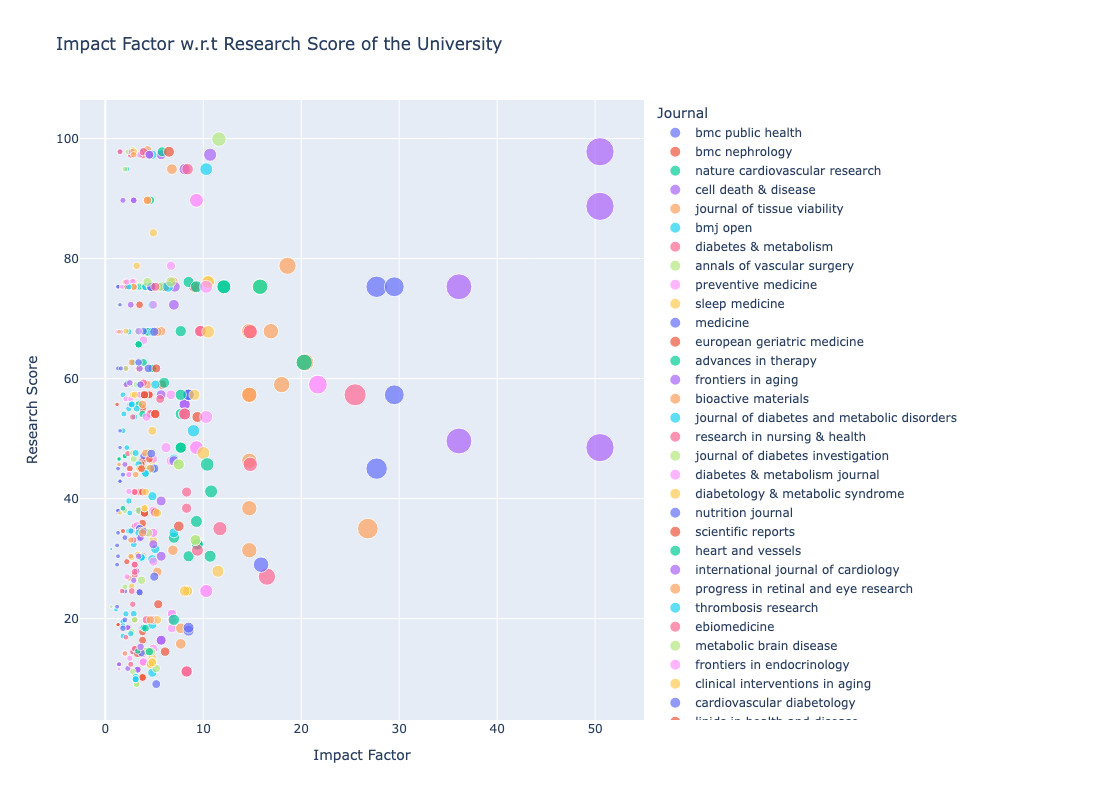

In [28]:
import plotly.express as px

# Handle missing values in the 'size' column
df["Impact_Factor_5Years"] = pd.to_numeric(df["Impact_Factor_5Years"], errors="coerce")
df["Impact_Factor_5Years"].fillna(0, inplace=True)  # Replace NaN with 0 or a default value

# Create the scatter plot
fig = px.scatter(
    df,
    x="Impact_Factor",
    y="Research_Score",
    size="Impact_Factor_5Years",  # Ensure this column has no NaN values
    color="Journal",
    hover_data=["Journal"],
    title="Impact Factor w.r.t Research Score of the University",
    labels={"Impact_Factor": "Impact Factor", "Research_Score": "Research Score"}
)

# Customize layout
fig.update_layout(width=1200, height=800)
fig.show()


R² Score: 0.03


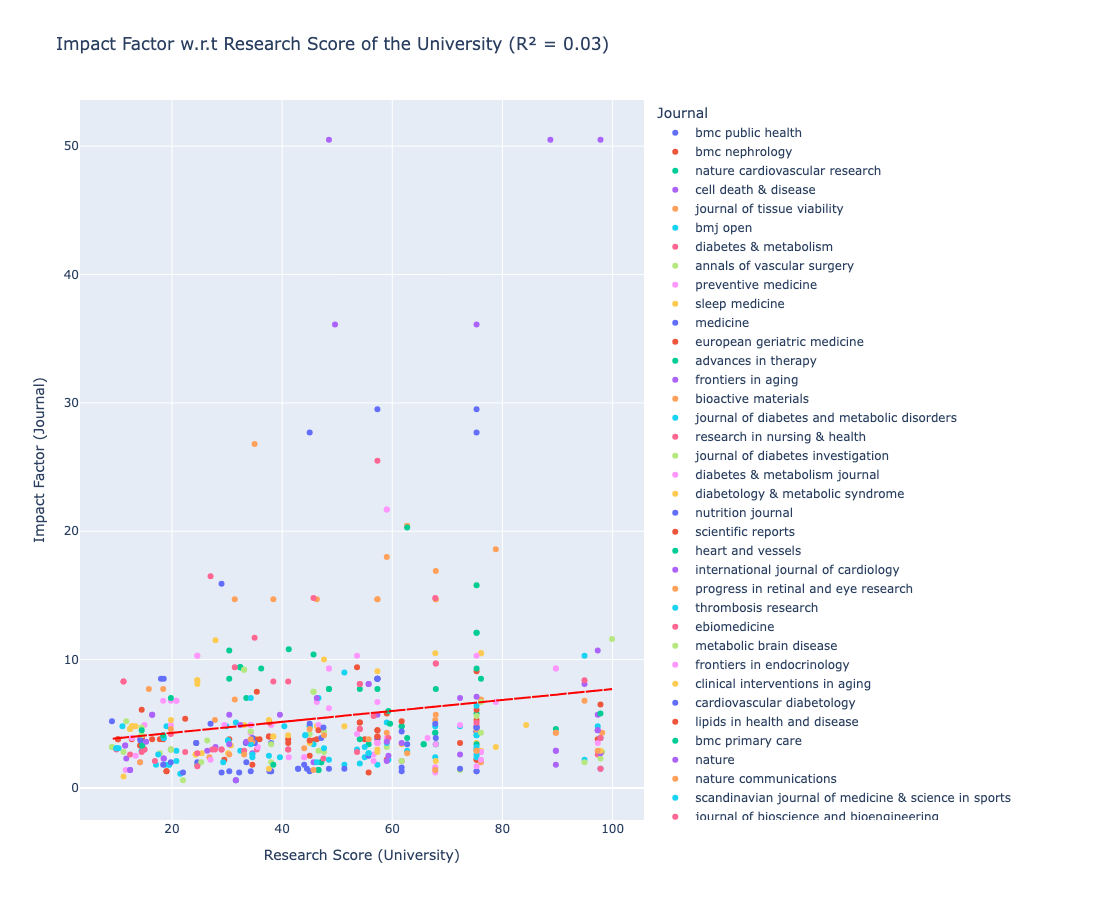

In [29]:
from sklearn.metrics import r2_score
# Reverse axis: Research Score (University) on X-axis, Impact Factor (Journal) on Y-axis
x = df["Research_Score"]
y = df["Impact_Factor"]

# Calculate regression line
coefficients = np.polyfit(x, y, 1)  # Linear regression
line = coefficients[0] * x + coefficients[1]  # Regression line

# Calculate R² score
r2 = r2_score(y, line)
print(f"R² Score: {r2:.2f}")

# Create scatter plot with regression line
fig = px.scatter(
    df,
    x="Research_Score",
    y="Impact_Factor",
    color="Journal",
    title=f"Impact Factor w.r.t Research Score of the University (R² = {r2:.2f})",
    labels={"Research_Score": "Research Score (University)", "Impact_Factor": "Impact Factor (Journal)"},
    hover_data=["Journal"]
)

# Add regression line
fig.add_scatter(
    x=x,
    y=line,
    mode="lines",
    name="Regression Line",
    line=dict(color="red", dash="dash")
)

# Customize layout
fig.update_layout(width=1200, height=900)
fig.show()


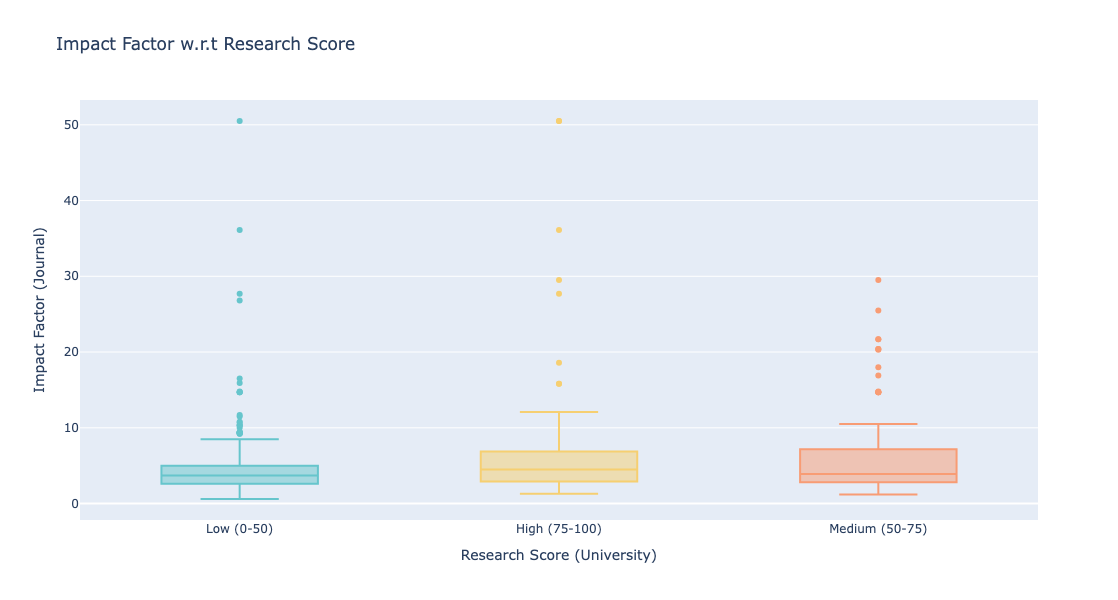

In [30]:
# Categorize Research Score into bins
df["Research_Score_Category"] = pd.cut(
    df["Research_Score"],
    bins=[0, 50, 75, 100],
    labels=["Low (0-50)", "Medium (50-75)", "High (75-100)"]
)

# Create box plot
fig = px.box(
    df,
    x="Research_Score_Category",
    y="Impact_Factor",
    color="Research_Score_Category",
    title="Impact Factor w.r.t Research Score",
    labels={"Research_Score_Category": "Research Score (University)", "Impact_Factor": "Impact Factor (Journal)"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout
fig.update_layout(
    showlegend=False,
    width=800,
    height=600
)
fig.show()


R² Score: 0.66


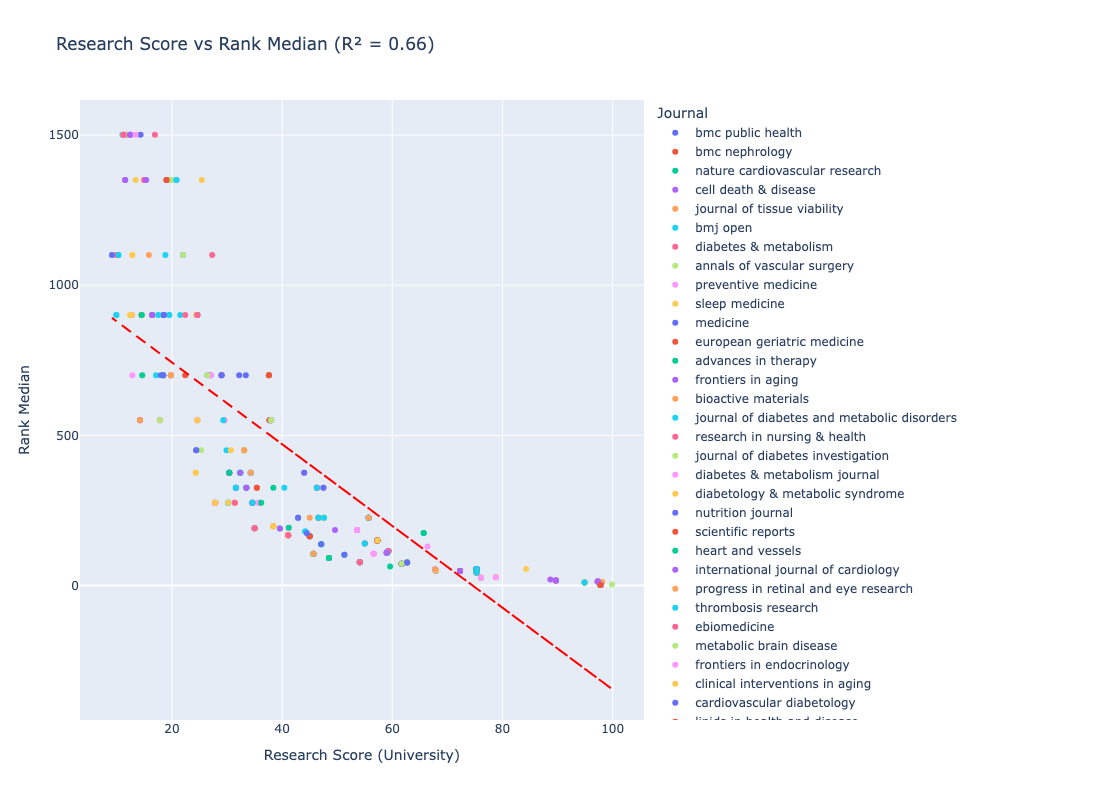

In [31]:
import plotly.express as px
import numpy as np
from sklearn.metrics import r2_score

# Reverse axis: Research Score (University) on X-axis, Rank Median on Y-axis
x = df["Research_Score"]
y = df["Rank_Median"]

# Calculate regression line
coefficients = np.polyfit(x, y, 1)  # Linear regression
line = coefficients[0] * x + coefficients[1]  # Regression line

# Calculate R² score
r2 = r2_score(y, line)
print(f"R² Score: {r2:.2f}")

# Create scatter plot with regression line
fig = px.scatter(
    df,
    x="Research_Score",
    y="Rank_Median",
    color="Journal",
    title=f"Research Score vs Rank Median (R² = {r2:.2f})",
    labels={"Research_Score": "Research Score (University)", "Rank_Median": "Rank Median"},
    hover_data=["Journal"]
)

# Add regression line
fig.add_scatter(
    x=x,
    y=line,
    mode="lines",
    name="Regression Line",
    line=dict(color="red", dash="dash")
)

# Customize layout
fig.update_layout(width=1200, height=800)
fig.show()


In [32]:
df.to_csv("final_pubmed_v3.csv")